#  Midterm: Computer vision ML Classification Deployment on Cloud

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#data_processing">Data Processing</a></li>
<li><a href="#model_building">Building and Traning the CNN Model</a></li>
<li><a href="#evaluation">Evaluation</a></li>
<li><a href="#inference">Inference</a></li>
<li><a href="#heatmap">Using Heat Maps</a></li>

</ul>

<a id='intro'></a>
# Introduction
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

Here are the classes in the dataset, as well as 10 random images from each: 
    
<img src="images/cifar.png">

The data will be downloaded using the TensorFlow API. 

In [1]:
# import deep learning library
import tensorflow as tf

# download dataset from tensorflow
(trainX, trainY), (testX, testY) = tf.keras.datasets.cifar100.load_data(label_mode="fine")

<a id='eda'></a>
# Exploratory Data Analysis
Let's expore how many samples we have in both, the training and testing set:

In [2]:
print(f"Training data: {trainX.shape} and their corresponding labels: {trainY.shape}")

Training data: (50000, 32, 32, 3) and their corresponding labels: (50000, 1)


We can see that we have 50000 samples for training, they are images of 32 pixels width by 32 pixels height and 3 color chanels. For every single sample we get a unique label. Now let's take a loot at the samples in the test set. 

In [3]:
print(f"Test data: {testX.shape} and their corresponding labels: {testY.shape}")

Test data: (10000, 32, 32, 3) and their corresponding labels: (10000, 1)


Here we can see that the shapes are consistent in both groups, we have 10000 additional samples for testing. We will have to split this group in half in order to get an additional validation set. 

Now let's take a look at the images and labels:

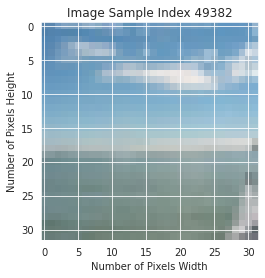

In [4]:
# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# set style to darkgrid
sns.set_style("darkgrid")

# import library to generate a random sample
import random

# generate a random index
i = random.randint(0, 50_000)

# plot random image
plt.imshow(trainX[i])
plt.xlabel("Number of Pixels Width")
plt.ylabel("Number of Pixels Height")
plt.title(f"Image Sample Index {i}");

Now let's take a look at the pixel values in random images:

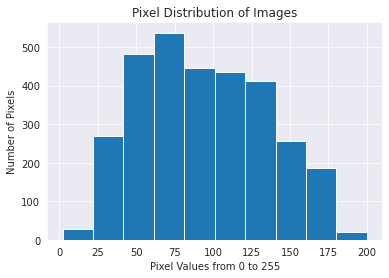

In [5]:
# generate random index
i = random.randint(0, 50_000)

# plot histogram of random image
plt.hist(trainX[i].flatten())
plt.xlabel("Pixel Values from 0 to 255")
plt.ylabel("Number of Pixels")
plt.title("Pixel Distribution of Images");

It's time to check the labels, we will start by taking a look at the first 10:

In [6]:
trainY[:10]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1],
       [86],
       [90],
       [28],
       [23],
       [31]])

As we saw on the introduction, we can get 100 possible labels in the output:

In [7]:
# import library for array computation
import numpy as np

# showing unique values
np.unique(trainY)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

Counting the frecuency of each of them:

In [8]:
# count frequency of each label in the training set
unique, counts = np.unique(trainY, return_counts=True)
dict(zip(unique, counts))

{0: 500,
 1: 500,
 2: 500,
 3: 500,
 4: 500,
 5: 500,
 6: 500,
 7: 500,
 8: 500,
 9: 500,
 10: 500,
 11: 500,
 12: 500,
 13: 500,
 14: 500,
 15: 500,
 16: 500,
 17: 500,
 18: 500,
 19: 500,
 20: 500,
 21: 500,
 22: 500,
 23: 500,
 24: 500,
 25: 500,
 26: 500,
 27: 500,
 28: 500,
 29: 500,
 30: 500,
 31: 500,
 32: 500,
 33: 500,
 34: 500,
 35: 500,
 36: 500,
 37: 500,
 38: 500,
 39: 500,
 40: 500,
 41: 500,
 42: 500,
 43: 500,
 44: 500,
 45: 500,
 46: 500,
 47: 500,
 48: 500,
 49: 500,
 50: 500,
 51: 500,
 52: 500,
 53: 500,
 54: 500,
 55: 500,
 56: 500,
 57: 500,
 58: 500,
 59: 500,
 60: 500,
 61: 500,
 62: 500,
 63: 500,
 64: 500,
 65: 500,
 66: 500,
 67: 500,
 68: 500,
 69: 500,
 70: 500,
 71: 500,
 72: 500,
 73: 500,
 74: 500,
 75: 500,
 76: 500,
 77: 500,
 78: 500,
 79: 500,
 80: 500,
 81: 500,
 82: 500,
 83: 500,
 84: 500,
 85: 500,
 86: 500,
 87: 500,
 88: 500,
 89: 500,
 90: 500,
 91: 500,
 92: 500,
 93: 500,
 94: 500,
 95: 500,
 96: 500,
 97: 500,
 98: 500,
 99: 500}

we have 100 possible labels, let's create a bar plot to visualize it more easily:

Text(0.5, 1.0, 'Frequency of Each Label in the Training Set')

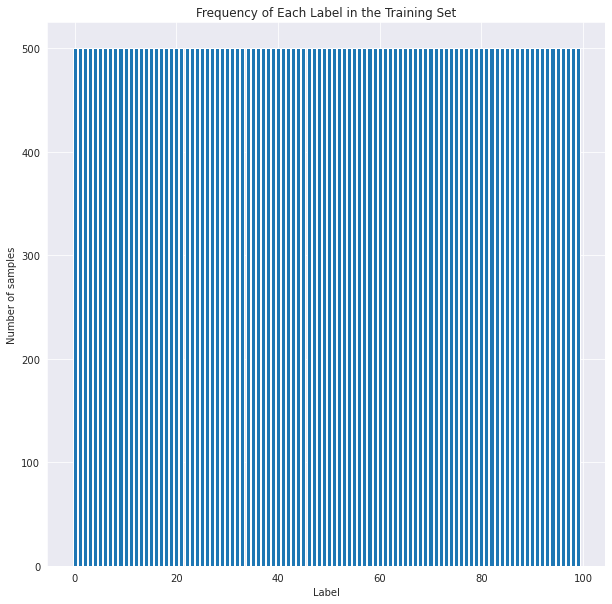

In [9]:
# plot bar chart of the frequency of each class
plt.figure(figsize=(10, 10))
plt.bar(unique, counts)
plt.xlabel("Label")
plt.ylabel("Number of samples")
plt.title("Frequency of Each Label in the Training Set")

Even if it's possible for an algorithm to map an image into a number, it's not very intuitive for us humans. For that we can check the equivalence of each index to the corresponding name. We can download the names in the Kaggle competition for the cifar100 dataset:

In [10]:
# function for reading labels in pickle file
def unpickle(file):
    with open(file, 'rb') as fo:
        import pickle
        myDict = pickle.load(fo, encoding='latin1')
    return myDict

Reading the data, it's in a dictionary form and contains information about the class and the subclass of the cifar dataset, in this exercise we are using the subclass that has 100 labels.

In [11]:
meta_data = unpickle('data/meta')

In [12]:
print(len(meta_data))

2


In [13]:
meta_data.keys()

dict_keys(['fine_label_names', 'coarse_label_names'])

In [14]:
len(meta_data["fine_label_names"])

100

In [15]:
labels = meta_data["fine_label_names"]

Let's double-check that we are correctly maping the index to the correct name:

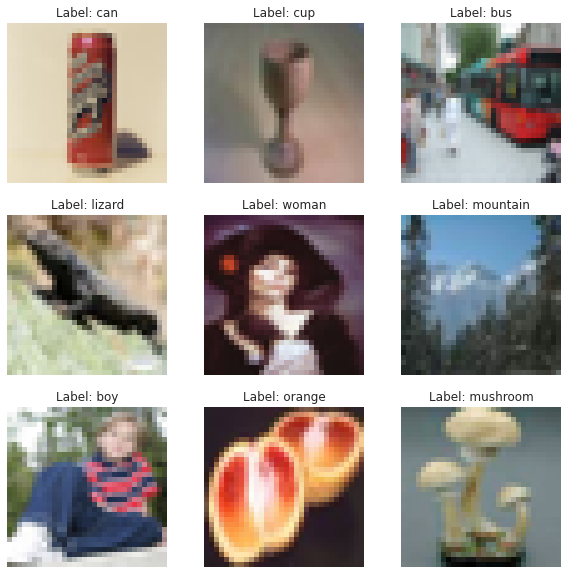

In [16]:
# generate array with random indexes
random_indexes = np.random.randint(0, 50_000, 9)

# adjust the size of the plot
plt.figure(figsize=(10,10))

# traverse array with random numbers and plot
for i, idx in enumerate(random_indexes):
    plt.subplot(330 + 1 + i)
    plt.imshow(trainX[idx])
    label = int(trainY[idx])
    plt.title(f"Label: {labels[label]}")
    plt.axis(False);

<a id='data_processing'></a>
# Data Processing
For this example we are going to divide the pixels by 255, which are the maximum value possible. The idea is that the neural network will receive ranges from 0 to 1, which make algorithms based on gradient descent converge faster. 

In [18]:
trainX = trainX / 255.0
testX = testX / 255.0

In [23]:
# dimensions of input data that the CNN will expect
output_neurons = 100
expect_img_width = 224
expect_img_height = 224
expected_channels = 3

input_shape = (expect_img_height, expect_img_width, expected_channels)

In [ ]:
validation_datagen = ImageDataGenerator(
    rescale = 1.0 / 255.,
    data_format= 'channels_last',
    dtype = tf.float32,
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


samples = trainX


train_datagen = ImageDataGenerator(
    #rescale = 1.0 / 255.,
    #image_size=(expect_img_width, expect_img_height),
    data_format= 'channels_last',
    dtype=tf.float32,
)

it = train_datagen.flow(samples,
                        target_size=(expect_img_width, expect_img_height),
                        batch_size=1)


for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)
    plt.title(image.shape)
    plt.axis(False)

In [ ]:

train_datagen.flow?

In [ ]:
# trainX = tf.keras.applications.efficientnet.preprocess_input(
#     trainX, data_format=None
# )
 
# testX = tf.keras.applications.efficientnet.preprocess_input(
#     trainX, data_format=None
# )

In [19]:
trainY = tf.keras.utils.to_categorical(
    trainY, num_classes=None, dtype='float32'
)
print(trainY.shape)

(50000, 100)


In [20]:
testY = tf.keras.utils.to_categorical(
    testY, num_classes=None, dtype='float32'
)
print(testY.shape)

(10000, 100)


<a id='model_building'></a>
# Model Building

We proceed to create a convolutional neural network for this clasification exercise, we can select a huge variety of pre-trained CNNs from TensorFlow Hub, EfficientNet is the one selected due to it's effective compound scaling method (scaling all dimensions of depth/width/resolution):
<img src="https://miro.medium.com/max/1105/1*dZIOSPe8gFyOLPyISNwPVw.png">
The reason why I selected the smallest one it's because the other generated an "Exhausted Resources" error on my local computer.

In [25]:
# import tensorflow hub!
import tensorflow_hub as hub



original_dim = (32, 32, 3)
target_size = (expect_img_width, expect_img_height)
input = tf.keras.layers.Input(original_dim)
x = tf.keras.layers.Lambda(lambda image: tf.image.resize(image, target_size))(input)



# creating the CNN
model = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda image: tf.image.resize(image, target_size)),
    hub.KerasLayer("https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1",
                  trainable=True),
    tf.keras.layers.Dense(output_neurons, activation="softmax"),
])

# building the CNN
model.build([None, expect_img_height, expect_img_width, expected_channels])

In [26]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(lr=3e-4),
    loss = [tf.keras.losses.CategoricalCrossentropy(from_logits=True)],
    metrics = ["accuracy"]
)

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_2 (Lambda)            (None, 224, 224, 3)       0         
_________________________________________________________________
keras_layer (KerasLayer)     (None, 1280)              4049564   
_________________________________________________________________
dense (Dense)                (None, 100)               128100    
Total params: 4,177,664
Trainable params: 4,135,648
Non-trainable params: 42,016
_________________________________________________________________


Verification that GPU is available and ready to work:

In [28]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [29]:
# library to interact with the operative system
import os
# import library to work with date and time
import datetime

# use tensorboard to monitor training
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [31]:
# set hyper parameters for training
epochs = 15
batch_size = 8

h = model.fit(x=trainX, y=trainY, 
          validation_data=(testX, testY), 
          epochs=epochs, 
          batch_size=batch_size,
          callbacks=[tensorboard_callback])

Epoch 1/15
   2/6250 [..............................] - ETA: 34:26 - loss: 4.0046 - accuracy: 0.7500WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0287s vs `on_train_batch_end` time: 0.5808s). Check your callbacks.


6250/6250 [==============================] - ETA: 0s - loss: 4.0134 - accuracy: 0.7536WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0055s vs `on_test_batch_end` time: 0.0109s). Check your callbacks.


6250/6250 [==============================] - 565s 90ms/step - loss: 4.0134 - accuracy: 0.7536 - val_loss: 4.0697 - val_accuracy: 0.6932
Epoch 2/15
6250/6250 [==============================] - 590s 94ms/step - loss: 4.0080 - accuracy: 0.7590 - val_loss: 4.0569 - val_accuracy: 0.7059
Epoch 3/15
6250/6250 [==============================] - 593s 95ms/step - loss: 4.0008 - accuracy: 0.7671 - val_loss: 4.0686 - val_accuracy: 0.6952
Epoch 4/15
6250/6250 [==============================] - 580s 93ms/step - loss: 3.9969 - accuracy: 0.7718 - val_loss: 4.0564 - val_accuracy: 0.7094
Epoch 5/15
6250/6250 [==============================] - 568s 91ms/step - loss: 3.9900 - accuracy: 0.7794 - val_loss: 4.0579 - val_accuracy: 0.7072
Epoch 6/15
6250/6250 [==============================] - 570s 91ms/step - loss: 3.9866 - accuracy: 0.7826 - val_loss: 4.0461 - val_accuracy: 0.7205
Epoch 7/15
6250/6250 [==============================] - 574s 92ms/step - loss: 3.9795 - accuracy: 0.7906 - val_loss: 4.0597 - val

In [33]:
model.save("cifar100_classifier.h5")

In [40]:
predictions = model.predict_classes(testX)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


<a id='evaluation'></a>
# Evaluation

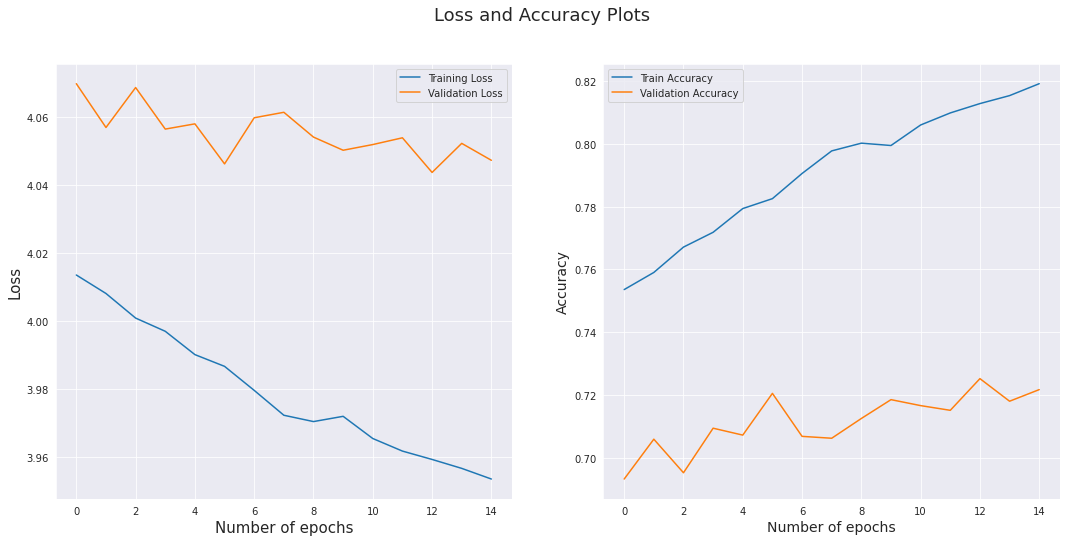

In [49]:
plt.figure(figsize=(18,8))

plt.suptitle('Loss and Accuracy Plots', fontsize=18)

plt.subplot(1,2,1)
plt.plot(h.history['loss'], label='Training Loss')
plt.plot(h.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Number of epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)

plt.subplot(1,2,2)
plt.plot(h.history['accuracy'], label='Train Accuracy')
plt.plot(h.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Number of epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.show()

In [35]:
from sklearn.metrics import accuracy_score

In [41]:
predictions.shape

(10000,)

In [42]:
testY.shape

(10000, 100)

In [45]:
testY[0].argmax()

49

In [48]:
print(accuracy_score(testY.argmax(axis=1), predictions))

0.7217


<a id='inference'></a>
# Inference

In [88]:
import cv2 
import numpy as np

def return_predicted_label(image):
    resized_img = cv2.resize(image, (224, 224), interpolation=cv2.INTER_CUBIC)
    expanded_image = np.expand_dims(resized_img, axis=0)
    prediction = model.predict_classes(expanded_image)[0]
    predicted_label = labels[prediction]
    return predicted_label

def return_original_label(index):
    original_label = testY[index]
    original_label = original_label.argmax()
    original_label = int(original_label)
    return original_label

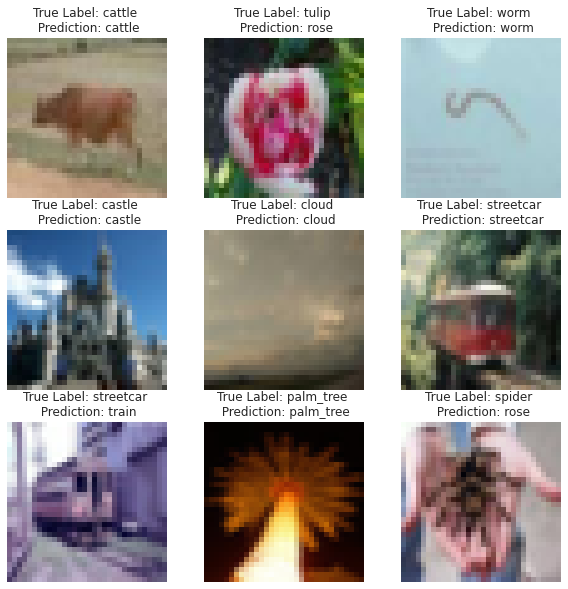

In [89]:
# generate array with random indexes
random_indexes = np.random.randint(0, 10_000, 9)

# adjust the size of the plot
plt.figure(figsize=(10,10))

# traverse array with random numbers and plot
for i, idx in enumerate(random_indexes):
    plt.subplot(330 + 1 + i)
    img = testX[idx]
    plt.imshow(img)
    label = return_original_label(idx)
    prediction = return_predicted_label(img)
    plt.title(f"True Label: {labels[label]} \n Prediction: {prediction}")
    plt.axis(False);

<a id='heatamp'></a>
# Heat Map
